## Nenegativna matrična faktorizacija in priporočilni sistemi

## Non-negative matrix factorization and recommender systems

Do sedaj smo obravnavali modele, ki so iz *več neodvisnih* napovedovali *eno* odvisno spremenljivko. V scenariju priporočilnega sistema smo tako za vsakega uporabnika zgradili svoj model.

Glavna motivacija metod za priporočilne sisteme je, da modeli uporabnikov med sabo *niso neodvisni*. Želimo enoten model, ki bo ovrednotil poljubno kombinacijo uporabnika in izdelka, ter implicitno izkoriščal medsebojno informacijo med različnimi modeli uporabnikov. 

Eden od modelov, ki se zelo pogosto uporabljajo v praksi je model matrične faktorizacije.
Ta predpostavlja matriko uporabnikov in izdelkov, ki ji predstavimo kot produkt dveh matrik *nižjega ranga*. Slednja lastnost omogoča stiskanje informacije in sklepanje o novih (ne-videnih, manjkajočih vrednosti) v izvirni matriki.

So far, we have considered models that predicted *one* dependent variable from *several independent*. In the scenario of a recommendation system, we have built a model for each user.

The main motivation of methods for recommending systems is that user models are *not independent*. We want a single model that will evaluate any combination of user and product, and implicitly exploit mutual information between different user models.

One of the models that are very commonly used in practice is the model of matrix factorization.
This assumes a matrix of users and products that we present as a product of two matrices of a *lower rank*. The latter property allows compressing information and concluding new (unobserved, missing values) in the original matrix.

<img width=450 src="../slike/nmf-shema.png"/>

## Uvodne definicije

Matriko podatkov $\mathbf{X}$, ki vsebuje manjkajoče vrednosti, z modelom matrične faktorizacije predstavimo na naslednji način:
$ \mathbf{X} = \mathbf{W} \mathbf{H}^T + \mathbf{E} $,

torej kot produkt matrike $\mathbf{W}$, ki predstavlja prostor vrstic, $\mathbf{H}$ predstavlja prostor stolpcev, $\mathbf{E}$ pa ostanek oz. napako. Matriki $\mathbf{W}, \mathbf{H}$ si včasih predstavljamo kot hkratno gručenje stolpcev in vrstic. Matrike so naslednjih velikosti:
$$ \mathbf{X} \in \mathbb{R}^{m \times n}, \mathbf{W} \in \mathbb{R}^{m \times r}, \mathbf{H} \in \mathbb{R}^{n \times r},  \mathbf{E} \in \mathbb{R}^{m \times n}$$

Predostavljamo, da sta matriki $\mathbf{W}, \mathbf{H}$ *nizkega ranga*, kar v praksi pomeni da celotno informacijo iz $\mathbf{X}$ predstavljamo v stisnjeni obliki, torej
$r < m, r < n $.

Predpostavljamo tudi, da so matrike $\mathbf{X}$, $\mathbf{W}$ in $\mathbf{H}$ nenegativne. Tedaj govorimo o **nenegativni matrični faktorizaciji (NMF)**.
$x_{i, j} > 0, w_{i, k} > 0, h_{j, k} > 0, \forall i, j, k $.

Matrika napake $\mathbf{E}$ te omejitve nima (<font color="blue">razmisli</font>: zakaj?).

## Introductory definitions

We can present the data matrix $\mathbf{X}$ containing missing values with the matrix factorization model as follows:
$ \mathbf{X} = \mathbf{W} \mathbf{H}^T + \mathbf{E} $,

therefore as a product of the $\mathbf{W}$ matrix representing the row space, $\mathbf{H}$ represents the column space, and $\mathbf{E}$ is the residue or error. The $\mathbf{W}, \mathbf{H}$ matrices are sometimes represented as a concurrent clustering of columns and rows. Matrices are of the following sizes:
$$ \mathbf{X} \in \mathbb{R}^{m \times n}, \mathbf{W} \in \mathbb{R}^{m \times r}, \mathbf{H} \in \mathbb{R}^{n \times r}, \mathbf{E} \in \mathbb{R}^{m \times n}$$

We assume that the matrices $\mathbf{W}, \mathbf{H}$ are of *low rank*, which in practice means that the entire information from $\mathbf{X}$ is presented in a compressed form, that is,
$r < m, r < n $.

We also assume that the matrices $\mathbf{X}$, $\mathbf{W}$ and $\mathbf{H}$ are non-negative. Then we talk about **non-negative matrix factorization (NMF)**.
$x_{i, j} > 0, w_{i, k} > 0, h_{j, k} > 0, \forall i, j, k $.

The $\mathbf{E}$ error matrix does not have this limit (<font color="blue">think</font>: why?).

## Definicija problema

Želimo torej poiskati matriki $\mathbf{W}$ in $\mathbf{H}$, tako da vrednost napake karseda nizka. To lahko zapišemo kot naslednji optimizacijski problem:

$$ \text{min}_{\mathbf{W},\mathbf{H}}\ \| \mathbf{X} - \mathbf{W}\mathbf{H}^T \|_F^2 = \text{min}_{\mathbf{W},\mathbf{H}}\ J$$

Oznaka $\| \mathbf{A} \|_F = \sqrt{\sum_{i,j} a_{i,j}^2}$ predstavlja *Frobeniusovo normo* matrike $\mathbf{A}$.  (<font color="blue">razmisli</font>: Opaziš podobnost s srednjo kvadratično napako, ki smo jo spoznali v kontekstu linearne regresije?)

Vrednost $J$ imenujemo *kriterijska funkcija*, problem iskanja minimuma pa *optimizacijski oz. minimizacijski problem*.  **Posebnost** priporičilnih sistemov je ta, da napako računamo samo na vrednostih v $\mathbf{X}$, ki so znane. Kriterijska funkcija je torej:

$$ J = \sum_{i, j | x_{i,j} \not = 0} (x_{i, j} - \sum_{l=1}^{r} w_{i,l}h_{j, l} )^2 $$

Za ta konkreten problem velja, da nima globalno optimalne rešitve za spremenljivke $\mathbf{W},\mathbf{H}$.  Vseeno ga lahko rešimo npr. z odvajanjem kriterijske funkcije in premikanjem v negativni smeri gradienta. Dobimo 
*pravila za posodabljanje* vrednosti v $\mathbf{W},\mathbf{H}$:

Vse vrednosti $w_{i,k}$ in $h_{j, k}$ popravimo tako, da vrednost v prejšnji iteraciji *popravimo* v negativni smeri gradienta, s *korakom* $\eta$:

$$ w_{i,k}^{(t+1)}  = w_{i, k}^{(t)} - \eta \frac{\delta J}{\delta w_{i,k}} = w_{i, k}^{(t)} + \eta \sum_{j \ | \ x_{i,j} \not = 0} (x_{i,j} - \sum_{l=1}^r w_{i,l} h_{j, l})(w_{i, k}^{(t)})$$

$$ h_{j, k}^{(t+1)}  = h_{j, k}^{(t)} - \eta \frac{\delta J}{\delta h_{j, k}} = h_{j, k}^{(t)} + \eta \sum_{i \ | \  x_{i,j} \not = 0} (x_{i,j} - \sum_{l=1}^r w_{i,l} h_{j, l})(h_{j, k}^{(t)})$$

## Problem definition 

We want to find the matrices $\mathbf{W}$ and $\mathbf{H}$ so that the error value is as low as possible. This can be written as the following optimization problem:

$$ \text{min}_{\mathbf{W},\mathbf{H}}\ \| \mathbf{X} - \mathbf{W}\mathbf{H}^T \|_F^2 = \text{min}_{\mathbf{W},\mathbf{H}}\ J$$

The $\| \mathbf{A} \|_F = \sqrt{\sum_{i,j} a_{i,j}^2}$ notation represents the *Frobenius norm* of matrix $\mathbf{A}$. (<font color="blue">think</font>: Do you see the similarity with the mean square error that we have seen in the context of linear regression?)

The value $J$ is called *criterion function*, and the problem of searching for a minimum is *optimization or minimization problem*. **The particularity** of recommender systems is that we calculate the error only on the known values in $\mathbf{X}$. The criterion function is therefore:

$$ J = \sum_{i, j | x_{i,j} \not = 0} (x_{i, j} - \sum_{l=1}^{r} w_{i,l}h_{j, l} )^2 $$

This particular problem does not have a globally optimal solution for the variables $\mathbf{W},\mathbf{H}$. However, it can be solved, for example, by deriving the criterion function and moving in the negative direction of the gradient. We get 
*update rules* for values in $\mathbf{W},\mathbf{H}$:

All values of $w_{i,k}$ and $h_{j, k}$ are corrected so that the value in the previous iteration *is corrected* in the negative direction of the gradient, with *step* $\eta$:

$$ w_{i,k}^{(t+1)}  = w_{i, k}^{(t)} - \eta \frac{\delta J}{\delta w_{i,k}} = w_{i, k}^{(t)} + \eta \sum_{j \ | \ x_{i,j} \not = 0} (x_{i,j} - \sum_{l=1}^r w_{i,l} h_{j, l})(w_{i, k}^{(t)})$$

$$ h_{j, k}^{(t+1)}  = h_{j, k}^{(t)} - \eta \frac{\delta J}{\delta h_{j, k}} = h_{j, k}^{(t)} + \eta \sum_{i \ | \  x_{i,j} \not = 0} (x_{i,j} - \sum_{l=1}^r w_{i,l} h_{j, l})(h_{j, k}^{(t)})$$

## Stohastični gradientni sestop

Stohastični gradientni sestop (SGD) je postopek za reševanje optimizcijskih problemov, ki niso globalno rešljivi, za vse nastopajoče spremenljivke (v našem primeru vse $w_{i,k}$ in $h_{j, k}$) pa znamo izračunati odvod glede na kriterijsko funkcijo. To smo storili v prešnjem delu.
Postopek za iskanje *lokalnega minimuma* je naslednji.

1. Naključno nastavi vrednosti vseh spremenljivk  $w_{i,k}$ in $h_{j, k}$. V našem primeru 
    velja $w_{i,k} > 0$  in $h_{j, k} > 0$.
2. V iteraciji $t = 1...T$:
    
    2.1 V naključnem vrstnem redu posodabljaj $\forall i, k, j$
$$ w_{i,k}^{(t+1)}  = w_{i, k}^{(t)} - \eta \frac{\delta J}{\delta w_{i,k}} $$
$$ h_{j, k}^{(t+1)}  = h_{j, k}^{(t)} - \eta \frac{\delta J}{\delta h_{j, k}} $$
            

## Stochastic gradient descent

Stochastic gradient descent (SGD) is a procedure for solving optimization problems that are not globally solvable, so we can calculate the derivative according to the criterion function for all the variables (in our case all $w_{i,k}$ and $h_{j, k}$). We did this in the previous part.
The procedure for searching the *local minimum* is as follows.

1. Randomly set the values of all the variables $w_{i,k}$ and $h_{j, k}$. In our case
    $w_{i,k} > 0$ and $h_{j, k} > 0$ apply.
2. In the iteration $t = 1...T$:
    
    2.1 In the random order, update $\forall i, k, j$
$$ w_{i,k}^{(t+1)}  = w_{i, k}^{(t)} - \eta \frac{\delta J}{\delta w_{i,k}} $$
$$ h_{j, k}^{(t+1)}  = h_{j, k}^{(t)} - \eta \frac{\delta J}{\delta h_{j, k}} $$

<img width=450 src="../slike/gradient-descent-1.png"/>

Shematski prikaz gradientnega sestopa za hipotetični spremenljivki $w$, $h$ in kriterijsko funkcijo $J(w, h)$.

Schematic representation of the gradient descent for the hypothetical variable $w$, $h$ and the criterion function $J(w, h)$.

##### Vprašanje 6-1-1
Dopolni spodnjo implementacijo algoritma NMF, tako da uporabiš posodobitvena pravila v več iteracijah stohastičnega gradientnega sestopa. 
<br/>
<font color="blue">**Namig.**</font> Pri računanju gradienta upoštevaj samo vrednosti $x_{i, j}$, ki so znane (različne od 0). Za učinkovito implementacijo izračuna vsot
$\sum_{i \ | \  x_{i,j} \not = 0}$ in $\sum_{j \ | \  x_{i,j} \not = 0}$ najprej (pred začetkom iteracij):
* za vsako vrstico $i$ shranimo neničelne stolpce
* za vsak stolpec $j$ shranimo neničelne vrstice

##### Question 6-1-1
Complete the implementation of the NMF algorithm below by using the update rules in several iterations of a stochastic gradient descent.
<br/>
<font color="blue"> **Hint.** </font> Only calculate $x_{i, j}$ values that are known (different from 0) when calculating the gradient. For effective implementation, calculate sums
$\sum_{i \ | \  x_{i,j} \not = 0}$ and $\sum_{j \ | \  x_{i,j} \not = 0}$ first (before the beginning of iterations):
* for each row of $i$ we store non-columnar columns
* for each column $j$ we store non-linear rows

In [1]:
import numpy as np
import itertools
np.random.seed(42)

class NMF:
    
    """
    Fit a matrix factorization model for a matrix X with missing values.
    such that
        X = W H.T + E 
    where
        X is of shape (m, n)    - data matrix
        W is of shape (m, rank) - approximated row space
        H is of shape (n, rank) - approximated column space
        E is of shape (m, n)    - residual (error) matrix
    """
    
    def __init__(self, rank=10, max_iter=100, eta=0.01):
        """
        :param rank: Rank of the matrices of the model.
        :param max_iter: Maximum nuber of SGD iterations.
        :param eta: SGD learning rate.
        """
        self.rank = rank
        self.max_iter = max_iter
        self.eta = eta
    
    
    def fit(self, X, verbose=False):
        """
        Fit model parameters W, H.
        :param X: 
            Non-negative data matrix of shape (m, n)
            Unknown values are assumed to take the value of zero (0).
        """
        m, n = X.shape
        
        W = np.random.rand(m, self.rank)
        H = np.random.rand(n, self.rank)
 
        # Indices to model variables
        w_vars = list(itertools.product(range(m), range(self.rank)))
        h_vars = list(itertools.product(range(n), range(self.rank)))

        # Indices to nonzero rows/columns
        nzcols = dict([(j, X[:, j].nonzero()[0]) for j in range(n)])
        nzrows = dict([(i, X[i, :].nonzero()[0]) for i in range(m)])

        # nzrows[i] <- vrni stolpce j, tako da x_ij > 0
        
        
        # Errors
        self.error = np.zeros((self.max_iter,))

        for t in range(self.max_iter):
            np.random.shuffle(w_vars)
            np.random.shuffle(h_vars)

            for i, k in w_vars:
                # TODO: your code here
                # Calculate gradient and update W[i, k]
                pass

            for j, k in h_vars:
                # TODO: your code here
                # Calculate gradient and update H[j, k]
                pass
 
            self.error[t] = np.linalg.norm((X - W.dot(H.T))[X > 0])**2
            if verbose: print(t, self.error[t])
        
        self.W = W
        self.H = H
    
    
    def predict(self, i, j):
        """
        Predict score for row i and column j
        :param i: Row index.
        :param j: Column index.
        """
        return self.W[i, :].dot(self.H[j, :])
    

    def predict_all(self):
        """
        Return approximated matrix for all
        columns and rows.
        """
        return self.W.dot(self.H.T)

Rešitev najdete v 210-1.ipynb.

In [ ]:
%run 210-1.ipynb

Testirajmo metodo na matriki naključnih podatkov.

Test the method on a matrix of random data.

In [3]:
m = 100       # St. vrstic
n = 80        # St. stolpcev
rank = 5      # Rang model
error = 0.1   # Nakljucni šum
A = np.random.rand(m, rank*2)  
B = np.random.rand(n, rank*2)
X = A.dot(B.T) + error * np.random.rand(m, n)  # generiramo podatke

Poženemo iskanje parametrov $\mathbf{W}$, $\mathbf{H}$.

We start searching the parameters $\mathbf{W}$, $\mathbf{H}$.

In [4]:
model = NMF(rank=rank, max_iter=20, eta=0.001)
model.fit(X, verbose=True)

0 12613.3461865
1 8865.7674023
2 6258.72122328
3 4564.48119312
4 3507.09172719
5 2857.28615524
6 2457.70343426
7 2211.22459984
8 2058.68753067
9 1963.52531437
10 1904.70041063
11 1868.28530521
12 1846.15760499
13 1832.70750961
14 1825.05876535
15 1820.91412686
16 1819.01575813
17 1818.40050068
18 1818.64963201
19 1819.26317321


Napaka modela pada s številom iteracij.

Error of the model falls with number of iterations.

Text(0,0.5,'Objective function')

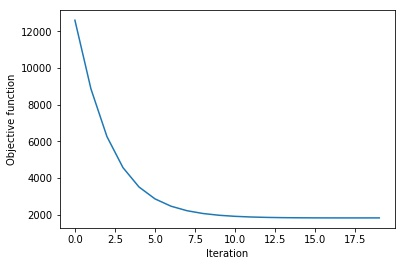

In [5]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt

plt.figure()
plt.plot(model.error)
plt.xlabel("Iteration")
plt.ylabel("Objective function")

Primerjajmo model in izvirne podatke.

Let's compare the model and the original data.

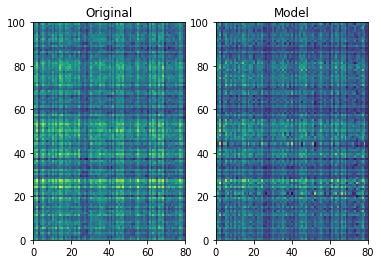

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolor(X)
ax[0].set_title("Original")

ax[1].pcolor(model.predict_all())
ax[1].set_title("Model")
plt.show()

Izračunamo pojasnjeno varianco.

We calculate the explained variance.

In [7]:
Xp = model.predict_all()
expl_var = (np.var(X) - np.var(X-Xp))/np.var(X)
expl_var

0.54540757795504591

##### Vprašanje 6-1-2
Kako se pojasnjena varianca spreminja z rangom modela, št. iteracij?

##### Question 6-1-2
How does the explained variance change with the rang of the model, no. of iterations?

In [8]:
for rank in range(3, 10):
    model = NMF(rank=rank, max_iter=20, eta=0.001)
    model.fit(X)
    Xp = model.predict_all()
    expl_var = (np.var(X) - np.var(X-Xp))/np.var(X)
    print(rank, expl_var)

3 0.457052738288
4 0.350202252528
5 0.516710453426
6 0.571824873689
7 0.629602311436
8 0.664761802112
9 0.687551091187


##### Vprašanje 6-1-3
Preizkusi metodo NMF na podatkovni zbirki Jester. Podatki so razdeljeni na učno in testno množico, kjer je v učni množici prisoten delež $p$ ocen. Poženi model na učni množici in izračunaj testno napako (RMSE, pojasnjeno varianco) na ocenah, ki niso bile uporabljene za učenje. Izračunaj, kako se testna napaka spreminja v odvisnosti od:
* delež učnih ocen $p$,
* ranga matrik modela (število $r$, parameter ```rank```)

##### Question 6-1-3
Test the NMF method on the Jester database. The data are divided into a learning and test set, where a share $p$ of ratings is present in the learning set. Run the model on the learning set and calculate the test error (RMSE, explained variance) on estimates that were not used for learning. Calculate how the test error varies depending on:
* the share of learning estimates of $p$,
* rank matrix of the model (number $r$, parameter ```rank```)

In [9]:
# Naložimo podatkovno zbirko Jester z 1% upoštevanih ocen
def load_jester(p=0.05):
    """
    :param p: Probability of rating appearing in the training set.
    :return
        X training grades (retining with probability p)
        Y test grades (whole dataset) 
    """

    Y = np.genfromtxt("podatki/jester-data.csv", delimiter=",", dtype=float, )
    Y = Y[:, 1:]
    Y[Y == 99] = 0 
    Y[Y != 0]  = Y[Y!=0] + abs(Y[Y!=0].min())

    # Separate data in test/train with probability p
    M = np.random.rand(*Y.shape) 
    M_tr = M < p
    M_te = M > p
    X = Y * M_tr
    Y = Y * M_te

    return X, Y

# X: 1% podatkov, Y ostalih 99% 
X, Y = load_jester(p=0.5)

X = X[:1000, :]
Y = Y[:1000, :]
print("X shape:", X.shape)
print("Y shape:", Y.shape)

print("X, Nonzeros:", np.sum(X>0), "Total:", X.shape[0]*X.shape[1])
print("Y, Nonzeros:", np.sum(Y>0), "Total:", Y.shape[0]*Y.shape[1])

X shape: (1000, 100)
Y shape: (1000, 100)
X, Nonzeros: 35573 Total: 100000
Y, Nonzeros: 35772 Total: 100000


In [10]:
model = NMF(rank=7, max_iter=20, eta=0.001)
model.fit(X)
Yp = model.predict_all()

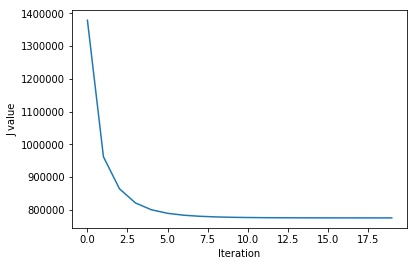

In [11]:
plt.figure()
plt.plot(model.error)
plt.xlabel("Iteration")
plt.ylabel("J value")
plt.show()

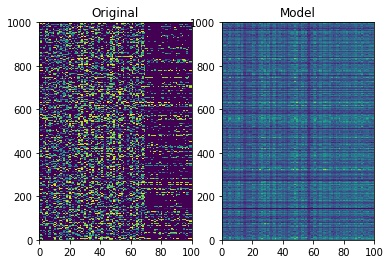

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolor(Y)
ax[0].set_title("Original")

ax[1].pcolor(Yp)
ax[1].set_title("Model")
plt.show()

In [13]:
expl_var = (np.var(Y[Y>0]) - np.var(Y[Y>0] - Yp[Y>0])) / np.var(Y[Y>0])
print(expl_var)

0.179283543202


##### Vprašanje 6-1-4
Na podatkovni zbirki Jester izberite eno celico z vrednostjo različno od 0 in jo nastavite na 0. Matriko faktorizirajte in napovejte vrednost te celice. 

##### Question 6-1-4
On the Jester database, select one cell with a value other than 0, and set it to 0. Factorize and predict the value of this cell.

##### Vprašanje 6-1-5
Poiščite celice, kjer je razlika med aproksimirano in originalno matriko največja. 

##### Question 6-1-5
Locate cells where the difference between the approximate and the original matrix is ​​greatest.

##### Vprašanje 6-1-6
Ustvarite priporočilni sistem. Izberite nekaj uporabnikov in za vsakega izpišite pet še neocenjenih šal, ki mu bodo najbolj všeč, glede na napoved.

##### Question 6-1-6
Create a recommended system. Choose a few users and for each of them output five yet unrated jokes that they will like the most, according to the prediction.